# Exercise 1: Non-sequential architectures

a) Re-use one of your best CNN architecture from PW04 or PW06 and transform the model definition to use non-sequential strategies such as multiple features or multiple paths as described in the slides.  
b) Optional : generate graphs of the architectures as shown in class. For that, you may install GraphViz to use the Keras function plot_model(), or an equivalent (note – you may need to launch the installation of pydot first with pip install pydot).  
c) Use callbacks to save the best trained models according to a monitoring of the accuracy on the test set.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

n_classes = 10
Y_train = keras.utils.to_categorical(y_train, num_classes=n_classes) # modify targets to 1-hot using utils.to_categorical()
Y_test = keras.utils.to_categorical(y_test, num_classes=n_classes)  # idem 

print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [14]:
def plot_log(log):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(log.history['loss'], label='Training loss')
    ax1.plot(log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(log.history['accuracy'], label='Training acc')
    ax2.plot(log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()
    plt.show()

In [11]:
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, concatenate, BatchNormalization

def get_model(n_filters, kernel_sizes, dropout_val):
    model = keras.Sequential()

    # Input layer
    visible = Input(shape=(32,32,3))

    # First feature extractor
    conv1_1 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[0], padding="same", activation="relu")(visible)
    batchnorm1_1 = BatchNormalization()(conv1_1)
    drop1_1 = Dropout(dropout_val)(batchnorm1_1)
    pool1_1 = MaxPooling2D(pool_size=(2,2))(drop1_1)
    conv1_2 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[0], padding="same", activation="relu")(pool1_1)
    batchnorm1_2 = BatchNormalization()(conv1_2)
    drop1_2 = Dropout(dropout_val)(batchnorm1_2)
    pool1_2 = MaxPooling2D(pool_size=(2,2))(drop1_2)
    conv1_3 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[0], padding="same", activation="relu")(pool1_2)
    batchnorm1_3 = BatchNormalization()(conv1_3)
    drop1_3 = Dropout(dropout_val)(batchnorm1_3)
    pool1_3 = MaxPooling2D(pool_size=(2,2))(drop1_3)
    flat1 = Flatten()(pool1_3)

    # Second feature extractor
    conv2_1 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[1], padding="same", activation="relu")(visible)
    batchnorm2_1 = BatchNormalization()(conv2_1)
    drop2_1 = Dropout(dropout_val)(batchnorm2_1)
    pool2_1 = MaxPooling2D(pool_size=(2,2))(drop2_1)
    conv2_2 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[1], padding="same", activation="relu")(pool2_1)
    batchnorm2_2 = BatchNormalization()(conv2_2)
    drop2_2 = Dropout(dropout_val)(batchnorm2_2)
    pool2_2 = MaxPooling2D(pool_size=(2,2))(drop2_2)
    conv2_3 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[1], padding="same", activation="relu")(pool2_2)
    batchnorm2_3 = BatchNormalization()(conv2_3)
    drop2_3 = Dropout(dropout_val)(batchnorm2_3)
    pool2_3 = MaxPooling2D(pool_size=(2,2))(drop2_3)
    flat2 = Flatten()(pool2_3)

    # Third feature extractor
    conv3_1 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[2], padding="same", activation="relu")(visible)
    batchnorm3_1 = BatchNormalization()(conv3_1)
    drop3_1 = Dropout(dropout_val)(batchnorm3_1)
    pool3_1 = MaxPooling2D(pool_size=(2,2))(drop3_1)
    conv3_2 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[2], padding="same", activation="relu")(pool3_1)
    batchnorm3_2 = BatchNormalization()(conv3_2)
    drop3_2 = Dropout(dropout_val)(batchnorm3_2)
    pool3_2 = MaxPooling2D(pool_size=(2,2))(drop3_2)
    conv3_3 = Conv2D(filters=n_filters, kernel_size=kernel_sizes[2], padding="same", activation="relu")(pool3_2)
    batchnorm3_3 = BatchNormalization()(conv3_3)
    drop3_3 = Dropout(dropout_val)(batchnorm3_3)
    pool3_3 = MaxPooling2D(pool_size=(2,2))(drop3_3)
    flat3 = Flatten()(pool3_3)

    # Merge layer
    merge = concatenate([flat1, flat2, flat3])

    # Interpretation layer
    hidden1 = Dense(100, activation="relu")(merge)

    # Output layer
    output = Dense(units=n_classes, activation="softmax")(hidden1)
    model = keras.models.Model(inputs=visible, outputs = output)
    print(model.summary())
    return model

In [16]:
from keras.callbacks import ModelCheckpoint

def train_model(model, n_epochs=25, batch_size=32):
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"]
                 )

    # Define callback
    checkpoint = ModelCheckpoint("model-{epoch:03d}.h5", verbose=1, monitor="val_accuracy", save_best_only=True, mode="auto")

    log = model.fit(x=X_train,
              y=Y_train,
              batch_size=batch_size,
              epochs=n_epochs,
              validation_data=(X_test, Y_test),
              callbacks=[checkpoint]
             )
    plot_log(log)
    res_train = model.evaluate(X_train, Y_train)
    print("Train loss, Train acc:", res_train)
    res_test = model.evaluate(X_test, Y_test)
    print("Test loss, Test acc:", res_test)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 32, 32, 16)   448         ['input_4[0][0]']                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 32, 32, 16)   1216        ['input_4[0][0]']                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 32, 32, 16)   2368        ['input_4[0][0]']                
                                                                                            

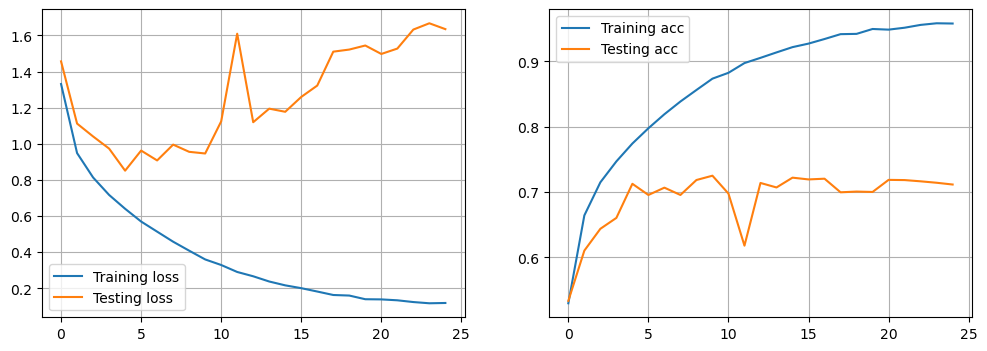

1563/1563 [==============================] - 4s 2ms/step - loss: 0.1538 - accuracy: 0.9469
Train loss, Train acc: [0.153756782412529, 0.9468600153923035]
313/313 [==============================] - 1s 3ms/step - loss: 1.6350 - accuracy: 0.7116
Test loss, Test acc: [1.6350409984588623, 0.7116000056266785]


In [18]:
# First model 
model1 = get_model(n_filters=16, kernel_sizes=[(3,3), (5,5), (7,7)], dropout_val=0)
train_model(model1, n_epochs=25)

# # Plot graph
# keras.utils.plot_model(model1, to_file="ex1_non_seq_ach_CIFAR10.png")

Graph plot (same for all models)
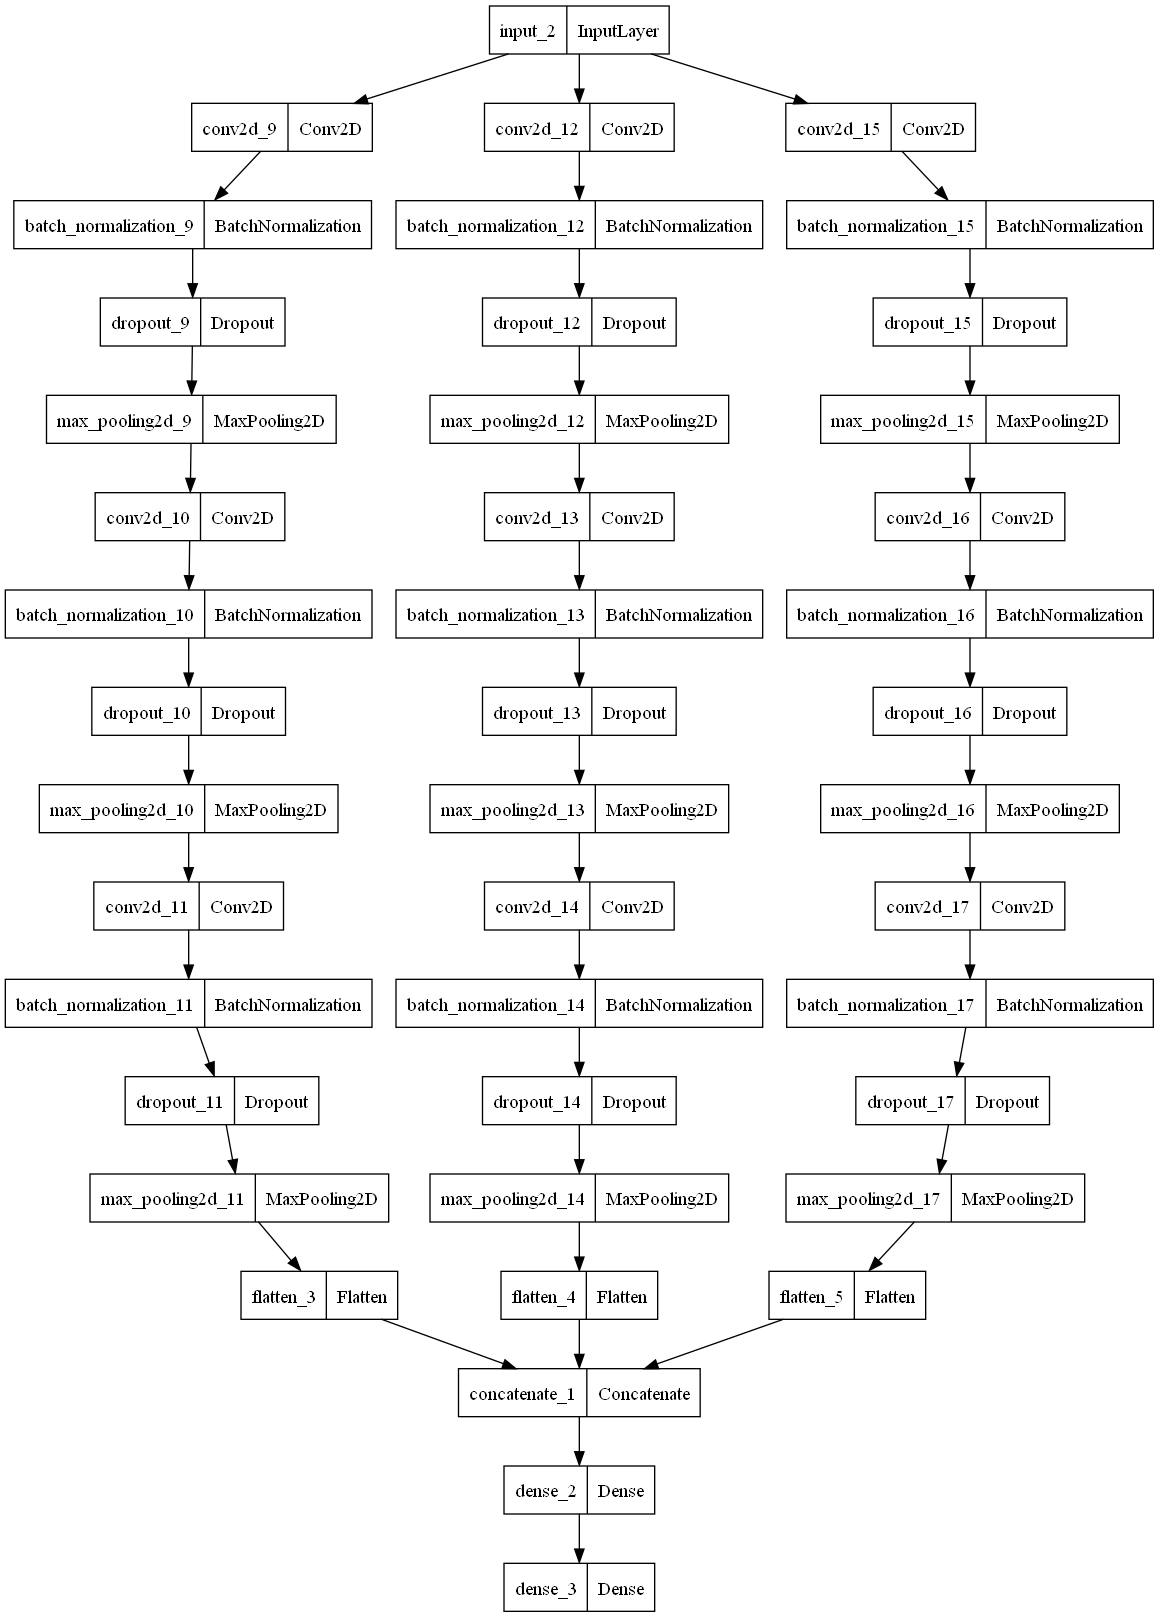

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_36 (Conv2D)             (None, 32, 32, 32)   896         ['input_5[0][0]']                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 32, 32, 32)   2432        ['input_5[0][0]']                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 32, 32, 32)   4736        ['input_5[0][0]']                
                                                                                            

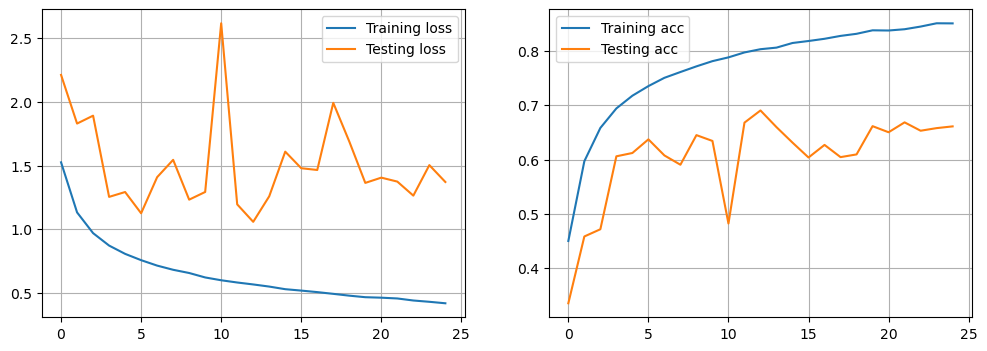

1563/1563 [==============================] - 4s 3ms/step - loss: 1.0332 - accuracy: 0.7147
Train loss, Train acc: [1.0331693887710571, 0.7146999835968018]
313/313 [==============================] - 1s 3ms/step - loss: 1.3708 - accuracy: 0.6611
Test loss, Test acc: [1.3708133697509766, 0.6610999703407288]


In [19]:
# Second model 
model2 = get_model(n_filters=32, kernel_sizes=[(3,3), (5,5), (7,7)], dropout_val=0.4)
train_model(model2, n_epochs=25)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_45 (Conv2D)             (None, 32, 32, 64)   1792        ['input_6[0][0]']                
                                                                                                  
 conv2d_48 (Conv2D)             (None, 32, 32, 64)   1792        ['input_6[0][0]']                
                                                                                                  
 conv2d_51 (Conv2D)             (None, 32, 32, 64)   4864        ['input_6[0][0]']                
                                                                                            

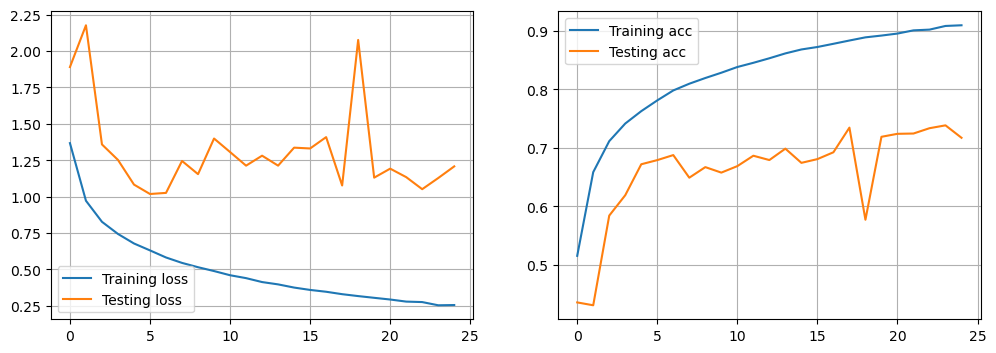

1563/1563 [==============================] - 5s 3ms/step - loss: 0.5757 - accuracy: 0.8259
Train loss, Train acc: [0.5756747126579285, 0.8259199857711792]
313/313 [==============================] - 1s 3ms/step - loss: 1.2081 - accuracy: 0.7173
Test loss, Test acc: [1.208145260810852, 0.7172999978065491]


In [20]:
# Third model 
model3 = get_model(n_filters=64, kernel_sizes=[(3,3), (3,3), (5,5)], dropout_val=0.3)
train_model(model3, n_epochs=25)

## Table (summary)
| Model | Architecture | Callback | Acc. train % (best) | Acc. test % (best) |
| --- | --- | --- | --- | --- |
| 1 | filter_size=16, kernel_sizes=[3, 5, 7], dropout=None | Yes | 0.8737 | 0.7251 |
| 2 | filter_size=32, kernel_sizes=[3, 5, 7], dropout=0.4 | Yes | 0.8032 | 0.6904 |
| 3 | filter_size=64, kernel_sizes=[3, 3, 5], dropout=0.3 | Yes | 0.9087 | 0.7386 |